 <img src="Images/fc.pos.jpg" class="bg-primary" align = 'left' width=200/>

# Academia de Física 2026


Neste notebook vamos pegar na experiência de Raios X  e fazer uma ajuste não linear a um dos picos do difratograma obtido a uma temperatura de $T=300$ K. Tentaremos o ajuste a dois perfis distintos, *Gaussiano* e *Lorentziano* 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pathlib import Path

In [2]:
# Diretoria corrente
mydir=Path.cwd()
print(mydir)

/home/jlsantos/trabalhos/cursos/Academia-de-Fisica-DFA/Academia-de-Fisica-DFA


Esta biblioteca facilita a definição de caminhos para aceder a ficheiros. Definidos deste modo são válidos em qualquer sistema operativo. 

In [3]:
# uma diretoria Dados, sub-diretoria da diretoria corrente
dadosPath=Path.cwd()/"Dados"
print(dadosPath)

/home/jlsantos/trabalhos/cursos/Academia-de-Fisica-DFA/Academia-de-Fisica-DFA/Dados


In [4]:
# aceder a um ficheiro na diretoria dados
acel50=np.loadtxt(dadosPath/'aceleracao50.csv',skiprows=1,delimiter=',')
acel50[:5]

array([[ 0.05565077,  0.05746084, -0.12449849,  9.90241814,  9.90336744],
       [ 0.06120554,  0.03830723, -0.06703765,  9.92157173,  9.92187216],
       [ 0.06621046,  0.03830723, -0.1436521 ,  9.97903252,  9.98013995],
       [ 0.07121531,  0.02873042, -0.20111294,  9.89284134,  9.89492706],
       [ 0.07622023,  0.02873042, -0.17238252,  9.94072533,  9.94226137]])

In [5]:
# para aceder a um ficheiro noutro local do sistema de ficheiros
altpath=Path(Path.cwd()/'2025Experiencias/XRD/BulkXRD')
print(altpath)

/home/jlsantos/trabalhos/cursos/Academia-de-Fisica-DFA/Academia-de-Fisica-DFA/2025Experiencias/XRD/BulkXRD


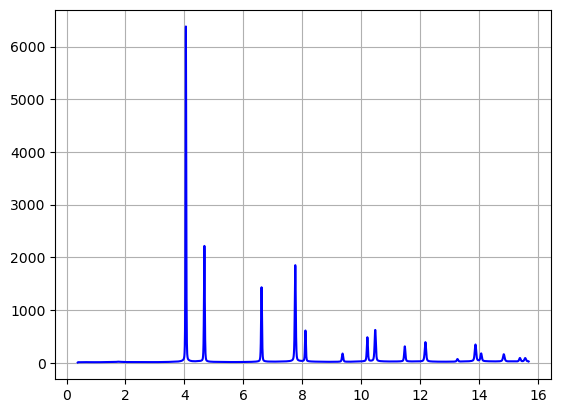

In [6]:
#Difratograma
dadosXR=np.loadtxt(altpath/'Bulk300K.chi',skiprows=1,delimiter=' ')
plt.plot(dadosXR[:,0],dadosXR[:,1], 'b-')
plt.grid(True)


(3.5, 4.5)

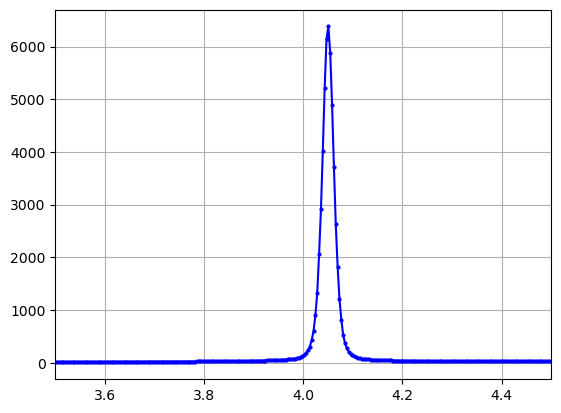

In [20]:
#Primeiro pico
dadosXR=np.loadtxt(altpath/'Bulk300K.chi',skiprows=1,delimiter=' ')
plt.plot(dadosXR[:,0],dadosXR[:,1], 'b-o',ms=2)
plt.grid(True)
plt.xlim([3.5,4.5])

Queremos selecionar o primeiro pico. Mas à priori não sabemos que elementos dos dados devemos extrair. A função `np.where()` resolve esse problema.


In [8]:
ang=dadosXR[:,0]
ints=dadosXR[:,1]
np.where(ang>3.9)

(array([ 942,  943,  944, ..., 4093, 4094, 4095]),)

In [9]:
np.where(ang>4.2)[0][0]

1022

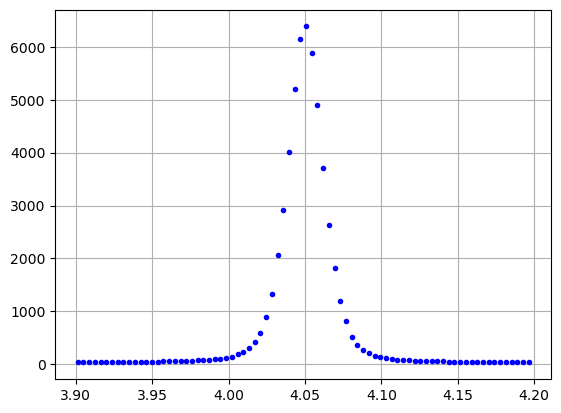

In [10]:
low_ind,up_ind=np.where(dadosXR[:,0]>3.9)[0][0],np.where(dadosXR[:,0]>4.2)[0][0]
#low_ind,up_ind=np.where(dadosXR[:,0]>4.0)[0][0],np.where(dadosXR[:,0]>4.10)[0][0]
data = dadosXR[low_ind:up_ind]
ang=data[:,0]
ints=data[:,1]
plt.plot(ang,ints, 'bo',ms =3)
plt.grid(True)

Agora vamos definir uma função para ajustar a estes dados. A função Gaussiana tem a forma

$$
g(x)=A \exp\left( \frac{-(x-\mu)^2}{2\sigma^2}\right)
$$
Não é difícil ver que o máximo occorre em $x=\mu$, o valor da função nesse ponto é $A$ e quando $x-\mu=\pm \sigma$ o valor da função é $A/\sqrt{e}=0.606A$

<div class="alert alert-block alert-warning">
    <b>Exercício 1</b>
    <p> Produz  gráficos da função de Gauss, variando os parâmetros $\mu, \sigma, A$ para teres uma ideia da maneira como determinam cada aspeto do gráfico.
</div>

In [11]:
x=np.linspace(0,10,100)

In [12]:
def gauss(x,mean,var,ampl):
    return ampl*np.exp(-(x-mean)**2/2/var)


In [21]:
guess=np.array([4.0,.1e-4,6000])
parms,cov=curve_fit(gauss,ang,ints,p0=guess)
parms

array([4.05015789e+00, 1.53231911e-04, 6.15284106e+03])

In [22]:
x=np.linspace(3.9,4.2,200)

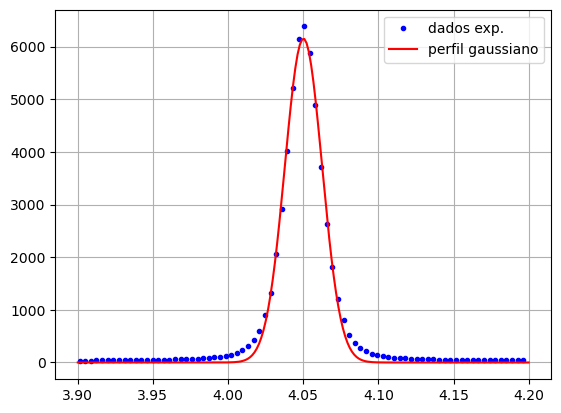

In [23]:
plt.plot(ang,ints, 'bo', ms =3, label="dados exp.")
plt.plot(x,gauss(x,parms[0],parms[1],parms[2]), 'r-',label='perfil gaussiano')
plt.legend()
plt.grid(True)

Um perfil muito usado nos ajustes a espectros é a função Lorentziana
$$
l(x)=\frac{A}{(x-\mu)^2+\Gamma^2}
$$

O máximo continua a ser em $x=\mu$ e a função vale $A/\Gamma^2$ . Para $x=\mu=\pm \Gamma$,  o valor da função é metade do do pico.  

In [24]:
def lorentz(x,mean,gamma2,ampl):
    return ampl/((x-mean)**2+gamma2)

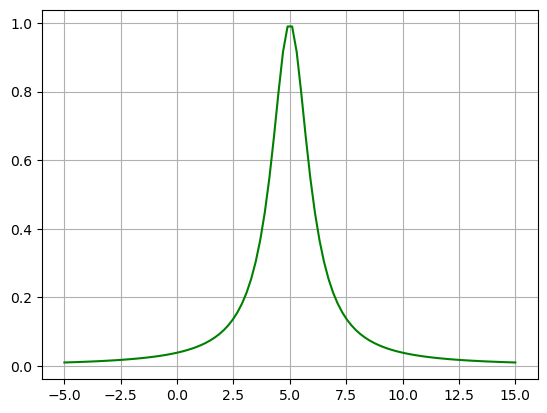

In [17]:
mu=5
Gamma=1
A=1
x=np.linspace(-5,15,100)
y=lorentz(x,mu,Gamma,A)
plt.plot(x,y,'g-')
plt.grid(True)

In [25]:
guess=np.array([4.05,.01,1])
parms2,cov=curve_fit(lorentz,ang,ints,p0=guess)
parms2

array([4.05014865e+00, 1.32355619e-04, 8.95193468e-01])

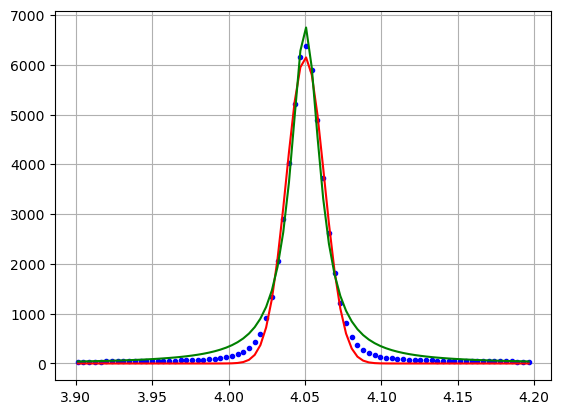

In [26]:
plt.plot(ang,ints, 'bo', ms =3)
plt.plot(ang,gauss(ang,parms[0],parms[1],parms[2]), 'r-')
plt.plot(ang, lorentz(ang,parms2[0],parms2[1],parms2[2]), 'g-')
plt.grid(True)

<div class="alert alert-block alert-warning">
    <b>Exercício 2</b>
    <p> Usa o que aprendeste aqui para analisar outro pico do difratograma
</div>